# Pyplot Tutorial

Welcome to Notebooks.ai ❤️, a fully online 🤖, cloud-based ☁️ Data Science environment. All your work, analysis and datasets organized in the same place 🙌.


In [6]:
import math
math.pi

3.141592653589793

In [29]:
np.linspace(0,10,5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [36]:
np.arange(0,10,.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

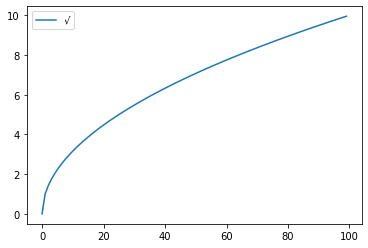

In [44]:
x = np.arange(100)
f = np.sqrt(x)
plt.plot(x,f)

plt.legend('√')

In [16]:
from numpy import pi
np.linspace( 0, 2, 9 )  # 9 numbers from 0 to 2

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [2]:
import matplotlib
matplotlib.font_manager._rebuild()

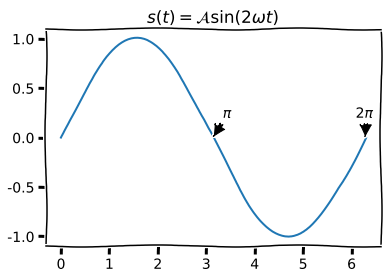

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace( 0, 2*np.pi, 100 ) # 100 numbers from 0 to 2
f = np.sin(x)
#plt.grid()
plt.xkcd(scale=1, length=200, randomness=4)
plt.title(r'$s(t) = \mathcal{A}\sin(2 \omega t)$')
plt.annotate('$\pi$', xy=(np.pi,0), xytext=(np.pi+.2, .2), arrowprops=dict(facecolor='black', shrink=.05))
plt.annotate('$2\pi$', xy=(2*np.pi,0), xytext=(2*np.pi-.2, .2), arrowprops=dict(facecolor='black', shrink=.05))
plt.plot(x,f)

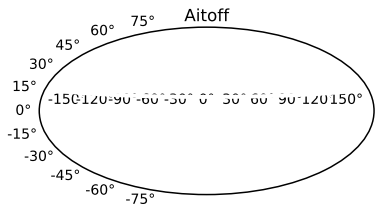

In [9]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(111, projection="aitoff")
plt.title("Aitoff")
plt.grid(True)

# Basic Subplot
[subplot demo](https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplot_demo.html)

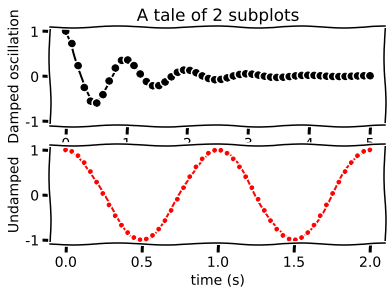

In [7]:
# Data for plotting
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

# Create two subplots sharing y axis
fig, (ax1, ax2) = plt.subplots(2, sharey=True)

ax1.plot(x1, y1, 'ko-')
ax1.set(title='A tale of 2 subplots', ylabel='Damped oscillation')

ax2.plot(x2, y2, 'r.-')
ax2.set(xlabel='time (s)', ylabel='Undamped')

plt.show()

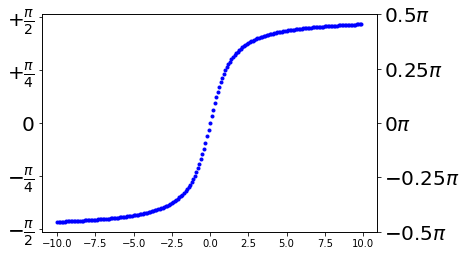

<Figure size 1728x1008 with 0 Axes>

In [47]:
import matplotlib.pyplot as plt
import numpy as np

x=np.arange(-10.0,10.0,0.1)
y=np.arctan(x)

fig = plt.figure()
ax  = fig.add_subplot(111)

ax.plot(x,y,'b.')

y_pi   = y/np.pi
unit   = 0.25
y_tick = np.arange(-0.5, 0.5+unit, unit)

y_label = [r"$-\frac{\pi}{2}$", r"$-\frac{\pi}{4}$", r"$0$", r"$+\frac{\pi}{4}$",   r"$+\frac{\pi}{2}$"]
ax.set_yticks(y_tick*np.pi)
ax.set_yticklabels(y_label, fontsize=20)

y_label2 = [r"$" + format(r, ".2g")+ r"\pi$" for r in y_tick]
ax2 = ax.twinx()
ax2.set_yticks(y_tick*np.pi)
ax2.set_yticklabels(y_label2, fontsize=20)

plt.show()

## Part 3: Interacting with data

Notebooks.ai and Jupyter Lab make it really simple to intereact with files in your local storage. These files are securely stored in the cloud and you can access them from anywhere in the world.

To show you the full potential of Notebooks.ai, we're going to pull cryptocurrencies prices from a public API and download them as Excel files, pretty fancy 😎. I need to import two libraries first: `requests` (to pull data from the web) and `pandas` to process it.

In [3]:
import requests
import pandas as pd

I have a predefined function that simplifies the process of importing data from [Cryptowatch](https://cryptowat.ch) (for reference, check [their docs](https://cryptowat.ch/docs/api#ohlc)).

In [4]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

I will now pull data from Bitcoin and Ether, two of the most popular cryptocurrencies, for the last 7 days:

In [5]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2018-10-04 19:05:56.958797')

In [6]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [7]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

**Bitcoin:**

In [8]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2018-10-04 19:00:00,6552.87,6572.03,6551.30,6557.04,177.172840,1162345.8
2018-10-04 20:00:00,6557.04,6573.01,6557.04,6565.92,192.690520,1265504.5
2018-10-04 21:00:00,6566.00,6572.98,6535.00,6545.05,206.450800,1351745.6
2018-10-04 22:00:00,6545.05,6557.58,6517.39,6545.00,178.217800,1163628.1
2018-10-04 23:00:00,6549.00,6563.98,6545.00,6554.20,62.939697,412657.6


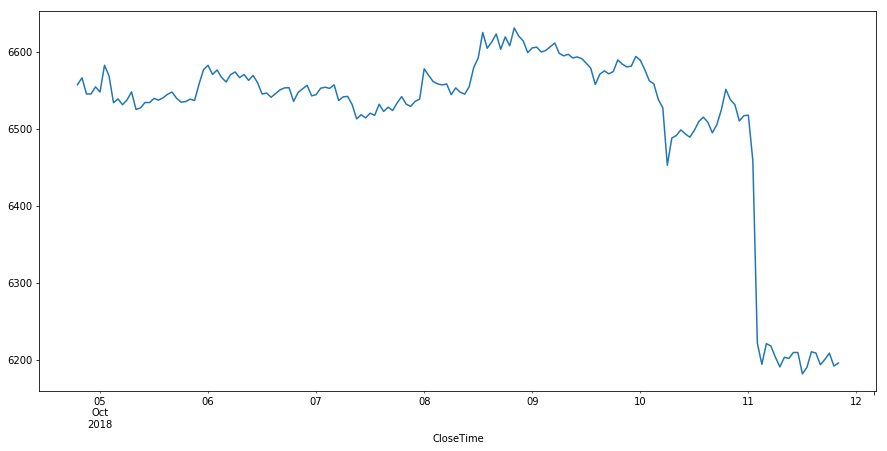

In [11]:
btc['ClosePrice'].plot(figsize=(15, 7))

**Ether:**

In [12]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2018-10-04 19:00:00,221.84,223.27,221.83,222.92,1555.00230,346043.220
2018-10-04 20:00:00,222.83,223.41,222.45,222.65,340.15000,75863.090
2018-10-04 21:00:00,222.76,223.06,220.81,221.45,707.83680,156992.550
2018-10-04 22:00:00,221.45,221.54,218.55,220.59,1649.08060,362885.030
2018-10-04 23:00:00,220.54,222.32,220.25,221.17,228.63876,50586.176


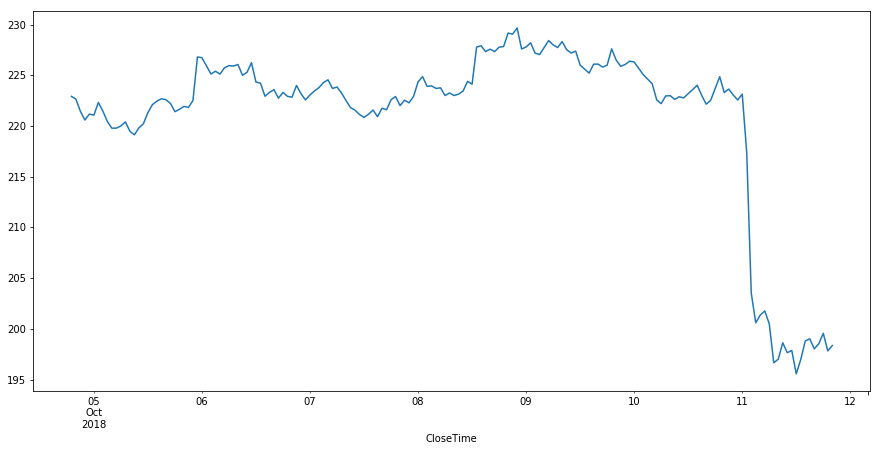

In [13]:
eth['ClosePrice'].plot(figsize=(15, 7))

As you can see, we're able to pull data from the internet with just a few lines, create a DataFrame and plot it all within Jupyter Lab.

In [14]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2018-10-04 19:00:00,221.84,223.27,221.83,222.92,1555.00230,346043.220
2018-10-04 20:00:00,222.83,223.41,222.45,222.65,340.15000,75863.090
2018-10-04 21:00:00,222.76,223.06,220.81,221.45,707.83680,156992.550
2018-10-04 22:00:00,221.45,221.54,218.55,220.59,1649.08060,362885.030
2018-10-04 23:00:00,220.54,222.32,220.25,221.17,228.63876,50586.176


### Bonus: Dynamic plots with Bokeh

We've also included [Bokeh](https://bokeh.pydata.org/) as part of this main distribution. Bokeh is a plotting library that generates interactive plots, that can be manipulated right within your browser.

We first need to import the libraries:

In [1]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [2]:
output_notebook()

Loading BokehJS ...

And we generate the plot:

In [18]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices")
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

☝️ as you can see, the plot is interactive. Try zomming in and out, and scrolling in the plot.

## Part 4: Exporting to Excel

We're now ready to generate an Excel file from the downloaded prices. Working with Excel and other formats (like CSV or JSON) is extremely simple in Jupyter Lab (thanks to pandas and Python). Our first step will be to create an "Excel writer", a component from the `pandas` package:

In [33]:
writer = pd.ExcelWriter('cryptos.xlsx')

We'll now write both our Bitcoin and Ether data as separate sheets:

In [30]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [31]:
eth.to_excel(writer, sheet_name='Ether')

And finally, we can save the file:

In [32]:
writer.save()